In [1]:
#%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [3]:
#Import CSV
csv = "Sales_Item_Merged.csv"
sales_data = pd.read_csv(csv)
sales_data.head()

,Silo,Silo_Description,Cust_ID,name_cust,id_st,Date_Invoice,id_item,descr_1,qty_ship,price_net,code_cat_prdt,category,flag_stat_item,code_comm,Item_Add_date
0,I,Industrial,22777,USHER OIL COMPANY,MI,3/18/2019,1000ABS550,ACTIV VIII,8,1750.56,10,AC8000 MOD,A,FNSG,6/12/2015
1,I,Industrial,22777,USHER OIL COMPANY,MI,5/21/2019,1000ABS550,ACTIV VIII,8,1838.08,10,AC8000 MOD,A,FNSG,6/12/2015
2,I,Industrial,22777,USHER OIL COMPANY,MI,2/11/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015
3,I,Industrial,22777,USHER OIL COMPANY,MI,4/6/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015
4,I,Industrial,22777,USHER OIL COMPANY,MI,8/19/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015


In [4]:
sales_data['year']= pd.DatetimeIndex(sales_data['Date_Invoice']).year
sales_data['month']= pd.DatetimeIndex(sales_data['Date_Invoice']).month
sales_data['category']= sales_data['category'].replace({'NOACIDCOIL': 'Coil Cleaner',
                                       'AG-MISC.':'Agricultural Products',
                                        'EPA - MISC' : 'Disinfectant',
                                        'NON8000MOD' : 'Multipurpose Cleaner',
                                        'AC8000 HD' : 'Degreaser',
                                        'MISC SPEC': 'Food Sanitation',
                                        'EPA-QT>8.1': "Quat Disinfectant",
                                        "AIRX PROD": "Odor Counteractives",
                                        'LUBRICANTS' : 'Lubricants',
                                        'NONMFG R/M' : 'Raw Material',
                                        'EUROPRO' : 'Private Label EUP',
                                        'KARCHER' : 'Private Label KNA ',
                                        'ENVIROCLNR': 'General Purpose Cleaner',
                                        'FF-HI SPD': 'Floor Finish',
                                        'EPA-QT NTR':'Sanitizer',
                                        'MICRONUTRI': 'Micro-Nutrients',
                                                        'AB/SURF': 'Super Concentrated Cleaners/Degreasers',
                                                        'D-LIM CLNR': 'Concentrated Cleaners/Degreasers',
                                                        'PEROXIDE': 'Peroxide Cleaners'
                                       })


In [5]:
convert_dict = {'year': object,
               'month': object}
sales_data = sales_data.astype(convert_dict)

In [6]:
sales_2019 = sales_data.loc[sales_data['year']== 2019,:]

In [7]:
sales_2020 = sales_data.loc[sales_data['year']== 2020,:]

# Silos vs. Product Category Comparisons - Jillian

In [8]:
#Silos vs. Product Category Comparisons - Jillian
#Sales by Category Yearly Comparisons - Eric
#Item Sales vs Date Added Comparisons - Amusa
#Top Items vs. # of Customers Purchasing - Kayla

In [9]:
silo_results = sales_data.groupby('Silo_Description').sum()
silo_results

,qty_ship,price_net
Silo_Description,,
Agricultural,256,10965.04
Contract,1352494,17473037.68
Industrial,299390,10772551.38
JanSan,1943708,4083871.05
Misc,7180,10299.17
Raw Mtrls,2,2683.87
Specialty,2593089,24096077.10


In [10]:
silo_results_2020 = sales_2020.groupby('Silo_Description').sum()
silo_results_2020

,qty_ship,price_net
Silo_Description,,
Agricultural,112,3199.84
Contract,989153,12838842.73
Industrial,188833,7469336.83
JanSan,1125623,2246719.09
Raw Mtrls,2,2683.87
Specialty,1309476,11892013.18


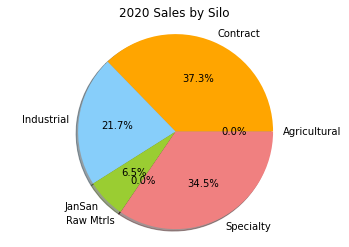

In [11]:
colors = ["lightcoral","orange","lightskyblue","yellowgreen","purple"]
twenty20_labels = silo_results_2020.index
plt.title('2020 Sales by Silo')
plt.pie(silo_results_2020['price_net'], labels=twenty20_labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.axis("equal")
plt.savefig('Output_Results/SalesBySilo_2020.png')

In [12]:
silo_results_2019 = sales_2019.groupby('Silo_Description').sum()
silo_results_2019

,qty_ship,price_net
Silo_Description,,
Agricultural,144,7765.20
Contract,363341,4634194.95
Industrial,110557,3303214.55
JanSan,818085,1837151.96
Misc,7180,10299.17
Specialty,1283613,12204063.92


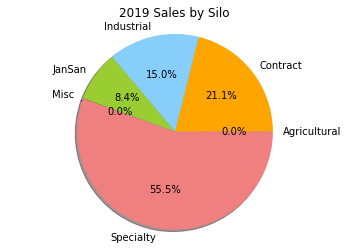

In [13]:
colors = ["lightcoral","orange","lightskyblue","yellowgreen","purple"]
twenty19_labels = silo_results_2019.index
plt.title('2019 Sales by Silo')
plt.pie(silo_results_2019['price_net'], labels=twenty19_labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.axis("equal")
plt.savefig('Output_Results/SalesBySilo_2019.png')

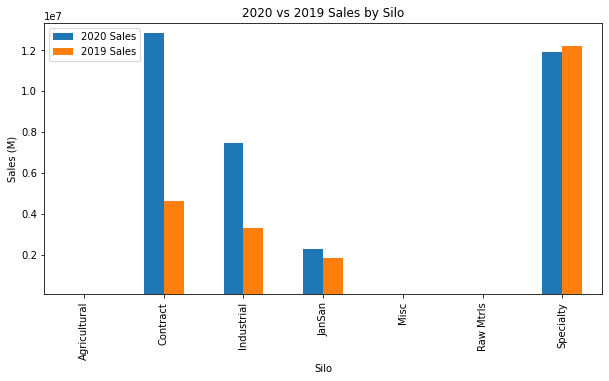

In [14]:
labels= silo_results.index
twenty20 = silo_results_2020['price_net']
twenty19 = silo_results_2019['price_net']
bar_df =pd.DataFrame({"2020 Sales": twenty20,
                     "2019 Sales": twenty19},
                    index=labels)
bar_df.plot(kind='bar',figsize=(10,5))
plt.title('2020 vs 2019 Sales by Silo')
plt.xlabel('Silo')
plt.ylabel('Sales (M)')
plt.ylim((50000,max(twenty20)+500000))
plt.savefig('Output_Results/SalesBySilo_2019v2020.png', bbox_inches="tight")

In [15]:
month_20 = sales_2020.groupby(['month','Silo_Description']).sum()
month_20.head()

qty_ship  price_net
month Silo_Description                     
1     Contract             33809  374390.26
      Industrial            4581  412568.18
      JanSan               52050  135465.43
      Raw Mtrls                2    2683.87
      Specialty            33269  912312.11

In [16]:
month_19 = sales_2019.groupby(['month','Silo_Description']).sum()
month_19.head()

qty_ship  price_net
month Silo_Description                     
1     Contract             25599  278488.34
      Industrial            2285  195166.52
      JanSan              103337  216354.18
      Misc                  1256    1428.16
      Specialty            35120  953642.98

In [17]:
month = month_20.reset_index('Silo_Description')
month.head()

,Silo_Description,qty_ship,price_net
month,,,
1,Contract,33809,374390.26
1,Industrial,4581,412568.18
1,JanSan,52050,135465.43
1,Raw Mtrls,2,2683.87
1,Specialty,33269,912312.11


In [18]:
jansan = month.loc[month["Silo_Description"] == 'JanSan',:]
ag = month.loc[month["Silo_Description"] == 'Agricultural',:]
ind = month.loc[month["Silo_Description"] == 'Industrial',:]
rm = month.loc[month["Silo_Description"] == 'Raw Mtrls',:]
specialty = month.loc[month["Silo_Description"] == 'Specialty',:]
contract = month.loc[month["Silo_Description"] == 'Contract',:]

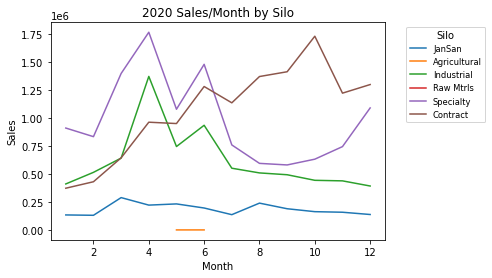

<Figure size 720x360 with 0 Axes>

In [19]:
months = month.index

jansan['price_net'].plot(label="JanSan")
ag['price_net'].plot(label="Agricultural")
ind['price_net'].plot(label="Industrial")
rm['price_net'].plot(label="Raw Mtrls")
specialty['price_net'].plot(label="Specialty")
contract['price_net'].plot(label="Contract")
plt.title('2020 Sales/Month by Silo')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Silo', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.figure(figsize=(10,5))
plt.savefig('Output_Results/SalesBySilo_Line2020.png',bbox_inches="tight")

In [20]:
mo_19 = month_19.reset_index('Silo_Description')


In [21]:
jansan_19 = mo_19.loc[mo_19["Silo_Description"] == 'JanSan',:]
ag_19 = mo_19.loc[mo_19["Silo_Description"] == 'Agricultural',:]
ind_19 = mo_19.loc[mo_19["Silo_Description"] == 'Industrial',:]
rm_19 = mo_19.loc[mo_19["Silo_Description"] == 'Raw Mtrls',:]
specialty_19 = mo_19.loc[mo_19["Silo_Description"] == 'Specialty',:]
contract_19 = mo_19.loc[mo_19["Silo_Description"] == 'Contract',:]

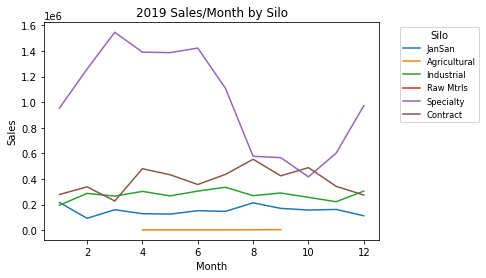

<Figure size 720x360 with 0 Axes>

In [48]:
months_19 = mo_19.index

jansan_19['price_net'].plot(label="JanSan")
ag_19['price_net'].plot(label="Agricultural")
ind_19['price_net'].plot(label="Industrial")
rm_19['price_net'].plot(label="Raw Mtrls")
specialty_19['price_net'].plot(label="Specialty")
contract_19['price_net'].plot(label="Contract")
plt.title('2019 Sales/Month by Silo')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Silo', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.figure(figsize=(10,5))
plt.savefig('Output_Results/SalesBySilo_Line2019.png',bbox_inches="tight")

In [23]:
product_categories = sales_data.groupby(['category'])
category_sales = product_categories.sum()

In [24]:
jansan_df = sales_data.loc[sales_data["Silo_Description"] == 'JanSan',:].groupby(['category','Silo_Description']).sum().reset_index('Silo_Description').sort_values(by='price_net',
                       ascending=False)
ag_df = sales_data.loc[sales_data["Silo_Description"] == 'Agricultural',:].groupby(['category','Silo_Description']).sum().reset_index('Silo_Description').sort_values(by='price_net',
                       ascending=False)
ind_df = sales_data.loc[sales_data["Silo_Description"] == 'Industrial',:].groupby(['category','Silo_Description']).sum().reset_index('Silo_Description').sort_values(by='price_net',
                       ascending=False)
rm_df = sales_data.loc[sales_data["Silo_Description"] == 'Raw Mtrls',:].groupby(['category','Silo_Description']).sum().reset_index('Silo_Description').sort_values(by='price_net',
                       ascending=False)
specialty_df = sales_data.loc[sales_data["Silo_Description"] == 'Specialty',:].groupby(['category','Silo_Description']).sum().reset_index('Silo_Description').sort_values(by='price_net',
                       ascending=False)
contract_df = sales_data.loc[sales_data["Silo_Description"] == 'Contract',:].groupby(['category','Silo_Description']).sum().reset_index('Silo_Description').sort_values(by='price_net',
                       ascending=False)

In [25]:
jansan_df_20 = sales_2020.loc[sales_2020["Silo_Description"] == 'JanSan',:].groupby(['category','Silo_Description']).sum().reset_index('Silo_Description').sort_values(by='price_net',
                       ascending=False)
ag_df_20 = sales_2020.loc[sales_2020["Silo_Description"] == 'Agricultural',:].groupby(['category','Silo_Description']).sum().reset_index('Silo_Description').sort_values(by='price_net',
                       ascending=False)
ind_df_20 = sales_2020.loc[sales_2020["Silo_Description"] == 'Industrial',:].groupby(['category','Silo_Description']).sum().reset_index('Silo_Description').sort_values(by='price_net',
                       ascending=False)
rm_df_20 = sales_2020.loc[sales_2020["Silo_Description"] == 'Raw Mtrls',:].groupby(['category','Silo_Description']).sum().reset_index('Silo_Description').sort_values(by='price_net',
                       ascending=False)
specialty_df_20 = sales_2020.loc[sales_2020["Silo_Description"] == 'Specialty',:].groupby(['category','Silo_Description']).sum().reset_index('Silo_Description').sort_values(by='price_net',
                       ascending=False)
contract_df_20 = sales_2020.loc[sales_2020["Silo_Description"] == 'Contract',:].groupby(['category','Silo_Description']).sum().reset_index('Silo_Description').sort_values(by='price_net',
                       ascending=False)
jansan_df_19 = sales_2019.loc[sales_2019["Silo_Description"] == 'JanSan',:].groupby(['category','Silo_Description']).sum().reset_index('Silo_Description').sort_values(by='price_net',
                       ascending=False)
ag_df_19 = sales_2019.loc[sales_2019["Silo_Description"] == 'Agricultural',:].groupby(['category','Silo_Description']).sum().reset_index('Silo_Description').sort_values(by='price_net',
                       ascending=False)
ind_df_19 = sales_2019.loc[sales_2019["Silo_Description"] == 'Industrial',:].groupby(['category','Silo_Description']).sum().reset_index('Silo_Description').sort_values(by='price_net',
                       ascending=False)
rm_df_19 = sales_2019.loc[sales_2019["Silo_Description"] == 'Raw Mtrls',:].groupby(['category','Silo_Description']).sum().reset_index('Silo_Description').sort_values(by='price_net',
                       ascending=False)
specialty_df_19 = sales_2019.loc[sales_2019["Silo_Description"] == 'Specialty',:].groupby(['category','Silo_Description']).sum().reset_index('Silo_Description').sort_values(by='price_net',
                       ascending=False)
contract_df_19 = sales_2019.loc[sales_2019["Silo_Description"] == 'Contract',:].groupby(['category','Silo_Description']).sum().reset_index('Silo_Description').sort_values(by='price_net',
                       ascending=False)

In [26]:
sales_by_category = sales_data.groupby('category').sum().sort_values(by='price_net',
                       ascending=False).head(10)
sales_by_category['JanSan']= jansan_df['price_net']
sales_by_category['Ag']= ag_df['price_net']
sales_by_category['Industrial']= ind_df['price_net']
sales_by_category['Specialty']= specialty_df['price_net']
sales_by_category['Contract']= contract_df['price_net']
sales_by_category.fillna(0).head()

,qty_ship,price_net,JanSan,Ag,Industrial,Specialty,Contract
category,,,,,,,
Coil Cleaner,622582,11152632.70,4575.62,0.0,45399.18,11102657.90,0.00
Disinfectant,675553,6221422.46,2884.00,0.0,1778.00,21694.20,6195066.26
Agricultural Products,1756779,4926771.49,0.00,0.0,1445.58,4925325.91,0.00
Private Label EUP,306650,4718675.69,0.00,0.0,285285.00,0.00,4375670.69
Odor Counteractives,238016,3652887.40,191912.79,0.0,1710577.00,87937.06,1659092.70


In [27]:
sales_by_category_20 = sales_2020.groupby('category').sum().sort_values(by='price_net',
                       ascending=False).head(10)
sales_by_category_20['JanSan']= jansan_df_20['price_net']
sales_by_category_20['Ag']= ag_df_20['price_net']
sales_by_category_20['Industrial']= ind_df_20['price_net']
sales_by_category_20['Specialty']= specialty_df_20['price_net']
sales_by_category_20['Contract']= contract_df_20['price_net']
sales_by_category_20.fillna(0).head()

,qty_ship,price_net,JanSan,Ag,Industrial,Specialty,Contract
category,,,,,,,
Coil Cleaner,280145,5026442.83,1632.28,0.0,23989.02,5000821.53,0.00
Private Label EUP,293713,4670470.83,0.00,0.0,285285.00,0.00,4327465.83
Disinfectant,406492,4087757.98,1628.00,0.0,1778.00,21694.20,4062657.78
Odor Counteractives,235611,3582473.47,149522.09,0.0,1701682.00,83990.56,1643910.97
Private Label KNA,39058,2860615.12,0.00,0.0,2860615.12,0.00,0.00


In [28]:
sales_by_category_19 = sales_2019.groupby('category').sum().sort_values(by='price_net',
                       ascending=False).head(10)
sales_by_category_19['JanSan']= jansan_df_19['price_net']
sales_by_category_19['Ag']= ag_df_19['price_net']
sales_by_category_19['Industrial']= ind_df_19['price_net']
sales_by_category_19['Specialty']= specialty_df_19['price_net']
sales_by_category_19['Contract']= contract_df_19['price_net']
sales_by_category_19.fillna(0).head()

,qty_ship,price_net,JanSan,Ag,Industrial,Specialty,Contract
category,,,,,,,
Coil Cleaner,342437,6126189.87,2943.34,0.0,21410.16,6101836.37,0.00
Agricultural Products,863460,2478971.51,0.00,0.0,1082.16,2477889.35,0.00
Disinfectant,269061,2133664.48,1256.00,0.0,0.00,0.00,2132408.48
NuFiber,859254,1301721.26,1206150.00,0.0,75357.69,4256.40,0.00
Multipurpose Cleaner,15259,992984.54,124510.29,0.0,453718.28,33119.55,381636.42


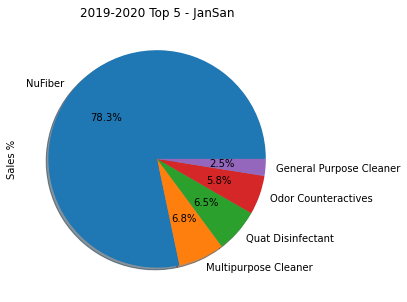

In [29]:
jansan_df['price_net'].head(5).plot(kind='pie', autopct='%1.1f%%', shadow=True,figsize=(10,5))
plt.title('2019-2020 Top 5 - JanSan')
plt.ylabel('Sales %')
plt.savefig('Output_Results/JanSan_Top5.png',bbox_inches="tight")

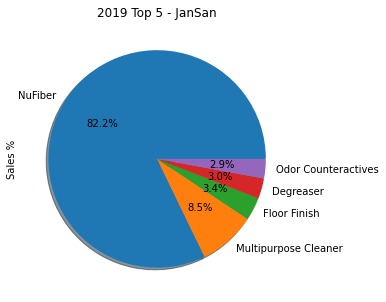

In [30]:
jansan_df_19['price_net'].head(5).plot(kind='pie', autopct='%1.1f%%', shadow=True,figsize=(10,5))
plt.title('2019 Top 5 - JanSan')
plt.ylabel('Sales %')
plt.savefig('Output_Results/JanSan_Top5_2019.png',bbox_inches="tight")

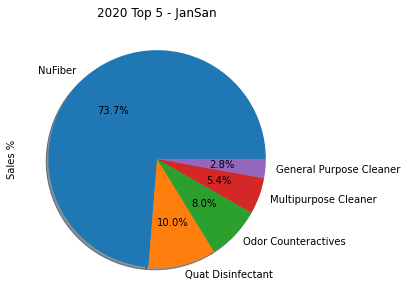

In [31]:
jansan_df_20['price_net'].head(5).plot(kind='pie', autopct='%1.1f%%', shadow=True,figsize=(10,5))
plt.title('2020 Top 5 - JanSan')
plt.ylabel('Sales %')
plt.savefig('Output_Results/JanSan_Top5_2020.png',bbox_inches="tight")

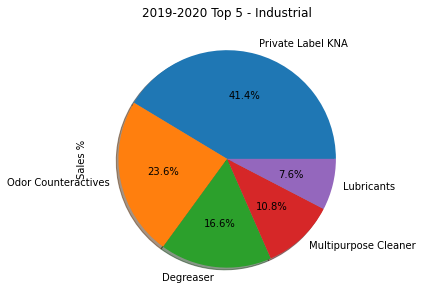

In [32]:
ind_df['price_net'].head(5).plot(kind='pie', autopct='%1.1f%%', shadow=True,figsize=(10,5))
plt.title('2019-2020 Top 5 - Industrial')
plt.ylabel('Sales %')
plt.savefig('Output_Results/Industrial_Top5.png',bbox_inches="tight")

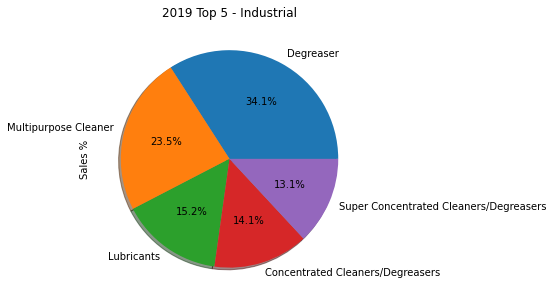

In [33]:
ind_df_19['price_net'].head(5).plot(kind='pie', autopct='%1.1f%%', shadow=True,figsize=(10,5))
plt.title('2019 Top 5 - Industrial')
plt.ylabel('Sales %')
plt.savefig('Output_Results/Industrial_Top5_2019.png',bbox_inches="tight")

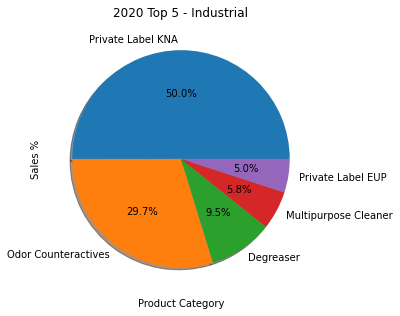

In [34]:
ind_df_20['price_net'].head(5).plot(kind='pie', autopct='%1.1f%%', shadow=True,figsize=(10,5))
plt.title('2020 Top 5 - Industrial')
plt.xlabel('Product Category')
plt.ylabel('Sales %')
plt.savefig('Output_Results/Industrial_Top5_2020.png',bbox_inches="tight")

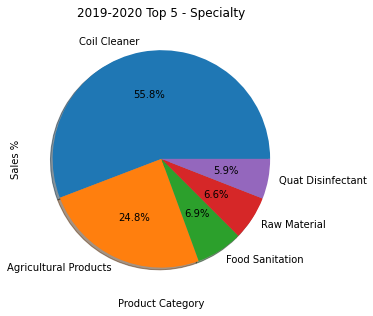

In [35]:
specialty_df['price_net'].head(5).plot(kind='pie', autopct='%1.1f%%', shadow=True,figsize=(10,5))
plt.title('2019-2020 Top 5 - Specialty')
plt.xlabel('Product Category')
plt.ylabel('Sales %')
plt.savefig('Output_Results/Specialty_Top5.png',bbox_inches="tight")

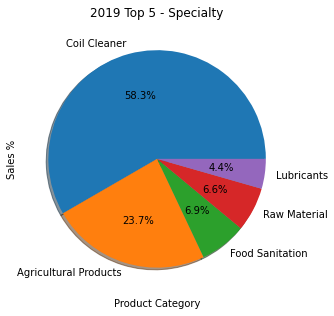

In [36]:
specialty_df_19['price_net'].head(5).plot(kind='pie', autopct='%1.1f%%', shadow=True,figsize=(10,5))
plt.title('2019 Top 5 - Specialty')
plt.xlabel('Product Category')
plt.ylabel('Sales %')
plt.savefig('Output_Results/Specialty_Top5_2019.png',bbox_inches="tight")

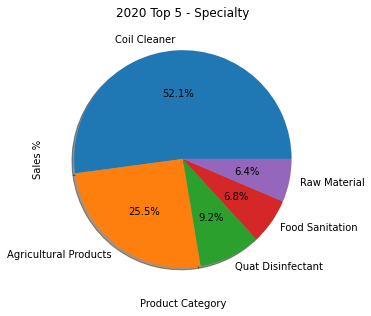

In [37]:
specialty_df_20['price_net'].head(5).plot(kind='pie', autopct='%1.1f%%', shadow=True,figsize=(10,5))
plt.title('2020 Top 5 - Specialty')
plt.xlabel('Product Category')
plt.ylabel('Sales %')
plt.savefig('Output_Results/Specialty_Top5_2020.png',bbox_inches="tight")

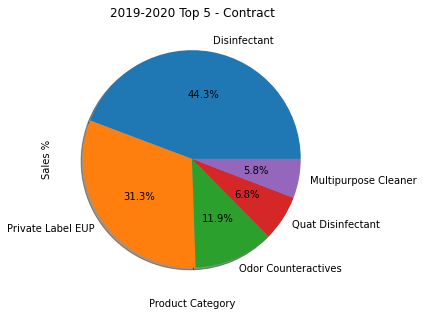

In [38]:
contract_df['price_net'].head(5).plot(kind='pie', autopct='%1.1f%%', shadow=True,figsize=(10,5))
plt.title('2019-2020 Top 5 - Contract')
plt.xlabel('Product Category')
plt.ylabel('Sales %')
plt.savefig('Output_Results/Contract_Top5.png',bbox_inches="tight")

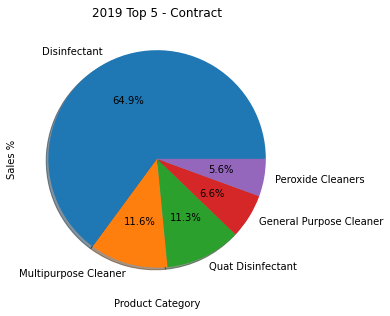

In [39]:
contract_df_19['price_net'].head(5).plot(kind='pie', autopct='%1.1f%%', shadow=True,figsize=(10,5))
plt.title('2019 Top 5 - Contract')
plt.xlabel('Product Category')
plt.ylabel('Sales %')
plt.savefig('Output_Results/Contract_Top5_2019.png',bbox_inches="tight")

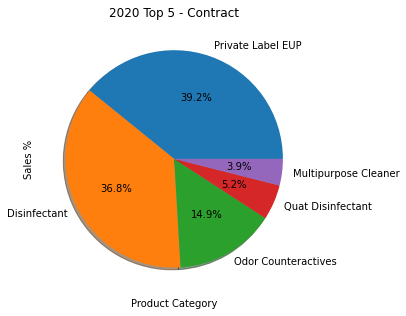

In [40]:
contract_df_20['price_net'].head(5).plot(kind='pie', autopct='%1.1f%%', shadow=True,figsize=(10,5))
plt.title('2020 Top 5 - Contract')
plt.xlabel('Product Category')
plt.ylabel('Sales %')
plt.savefig('Output_Results/Contract_Top5_2020.png',bbox_inches="tight")

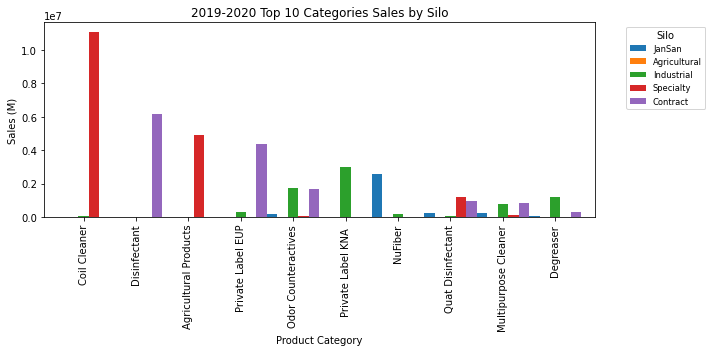

<Figure size 432x288 with 0 Axes>

In [41]:
labels= sales_by_category.head(10).index
jan_sales = sales_by_category['JanSan']
ag_sales = sales_by_category['Ag']
ind_sales =sales_by_category['Industrial']
spec_sales = sales_by_category['Specialty']
contract_sales = sales_by_category['Contract']
category_df =pd.DataFrame({"JanSan": jan_sales,
                           "Agricultural": ag_sales,
                           "Industrial":ind_sales,
                           "Specialty": spec_sales,
                           "Contract": contract_sales},
                    index=labels)
category_df.plot(kind='bar',figsize=(10,5), width=1)
plt.title('2019-2020 Top 10 Categories Sales by Silo')
plt.xlabel('Product Category')
plt.ylabel('Sales (M)')
plt.legend(title='Silo', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()
plt.savefig('Output_Results/Top10BySilo_2019_2020.png',bbox_inches="tight")

In [42]:
category_df

,JanSan,Agricultural,Industrial,Specialty,Contract
category,,,,,
Coil Cleaner,4575.62,NaN,45399.18,11102657.90,NaN
Disinfectant,2884.00,NaN,1778.00,21694.20,6195066.26
Agricultural Products,NaN,NaN,1445.58,4925325.91,NaN
Private Label EUP,NaN,NaN,285285.00,NaN,4375670.69
Odor Counteractives,191912.79,NaN,1710577.00,87937.06,1659092.70
Private Label KNA,NaN,NaN,2996502.02,NaN,NaN
NuFiber,2586622.37,NaN,171014.29,10761.47,NaN
Quat Disinfectant,216119.96,NaN,35068.88,1181178.34,948635.84
Multipurpose Cleaner,225600.70,NaN,783126.07,103439.72,816446.47


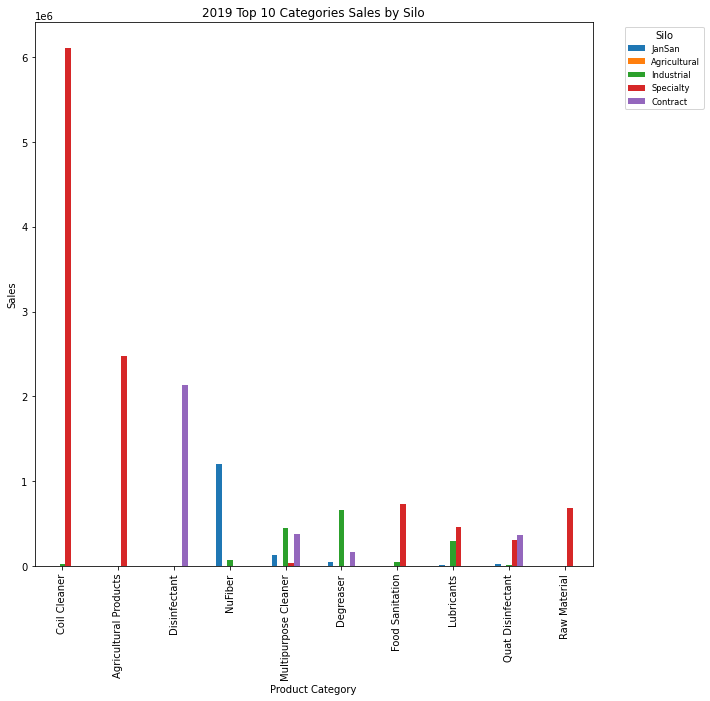

In [43]:
labels= sales_by_category_19.head(10).index
jan_sales_19 = sales_by_category_19['JanSan']
ag_sales_19 = sales_by_category_19['Ag']
ind_sales_19 =sales_by_category_19['Industrial']
spec_sales_19 = sales_by_category_19['Specialty']
contract_sales_19 = sales_by_category_19['Contract']
category_df_19 =pd.DataFrame({"JanSan": jan_sales_19,
                           "Agricultural": ag_sales_19,
                           "Industrial":ind_sales_19,
                           "Specialty": spec_sales_19,
                           "Contract": contract_sales_19},
                    index=labels)
category_df_19.plot(kind='bar',figsize=(10,10), width=.5)
plt.title('2019 Top 10 Categories Sales by Silo')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.legend(title='Silo', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.savefig('Output_Results/Top10BySilo_2019.png',bbox_inches="tight")

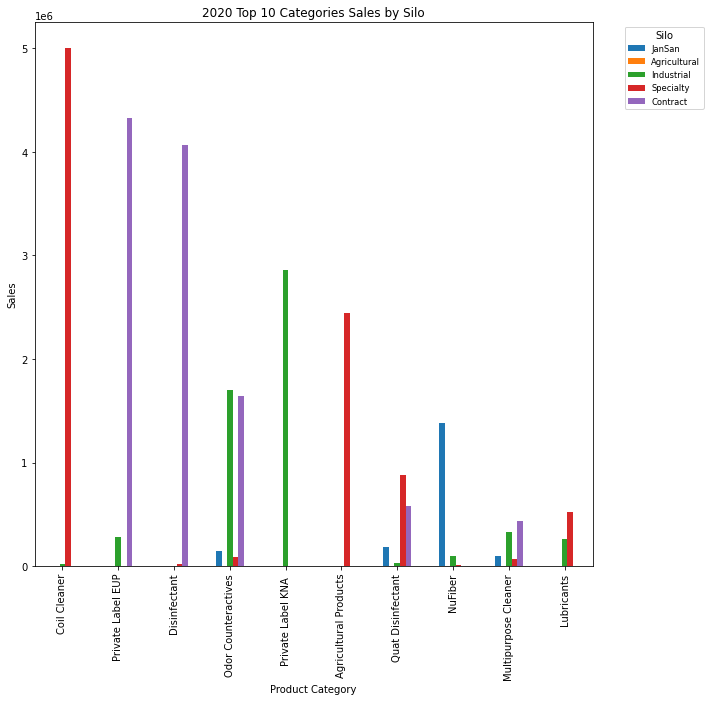

In [44]:
labels= sales_by_category_20.head(10).index
jan_sales_20 = sales_by_category_20['JanSan']
ag_sales_20 = sales_by_category_20['Ag']
ind_sales_20 =sales_by_category_20['Industrial']
spec_sales_20 = sales_by_category_20['Specialty']
contract_sales_20 = sales_by_category_20['Contract']
category_df_20 =pd.DataFrame({"JanSan": jan_sales_20,
                           "Agricultural": ag_sales_20,
                           "Industrial":ind_sales_20,
                           "Specialty": spec_sales_20,
                           "Contract": contract_sales_20},
                    index=labels)
category_df_20.plot(kind='bar', figsize=(10,10), width=.5)
plt.title('2020 Top 10 Categories Sales by Silo')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.legend(title='Silo', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.savefig('Output_Results/Top10BySilo_2020.png',bbox_inches="tight")

In [45]:
category_df_20

,JanSan,Agricultural,Industrial,Specialty,Contract
category,,,,,
Coil Cleaner,1632.28,NaN,23989.02,5000821.53,NaN
Private Label EUP,NaN,NaN,285285.00,NaN,4327465.83
Disinfectant,1628.00,NaN,1778.00,21694.20,4062657.78
Odor Counteractives,149522.09,NaN,1701682.00,83990.56,1643910.97
Private Label KNA,NaN,NaN,2860615.12,NaN,NaN
Agricultural Products,NaN,NaN,363.42,2447436.56,NaN
Quat Disinfectant,187979.92,NaN,28369.16,879816.66,578819.73
NuFiber,1380472.37,NaN,95656.60,6505.07,NaN
Multipurpose Cleaner,101090.41,NaN,329407.79,70320.17,434810.05


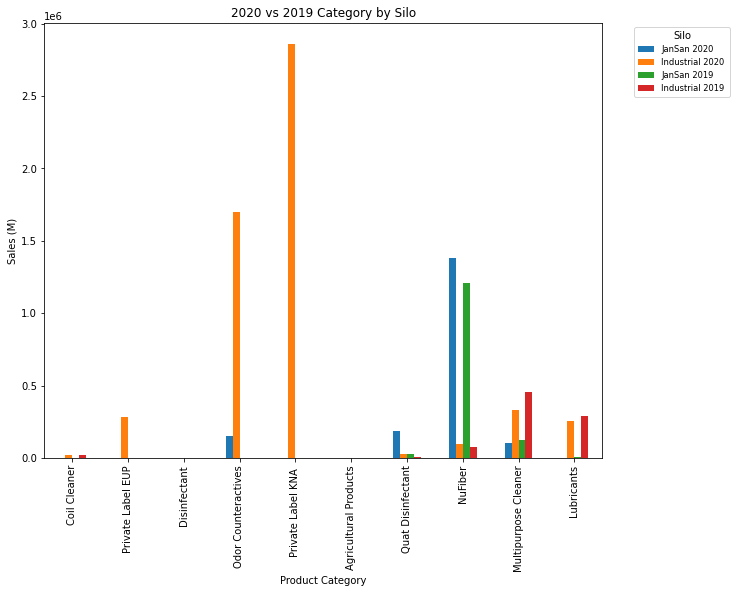

In [46]:
labels= sales_by_category_20.head(10).index
comparedf =pd.DataFrame({"JanSan 2020": jan_sales_20,
                           "Industrial 2020 ":ind_sales_20,
                         "JanSan 2019": jan_sales_19,
                           "Industrial 2019":ind_sales_19},
                    index=labels)
comparedf.plot(kind='bar',figsize=(10,8), width=.5)
plt.title('2020 vs 2019 Category by Silo')
plt.xlabel('Product Category')
plt.ylabel('Sales (M)')
plt.legend(title='Silo', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.savefig('Output_Results/2020v2019_CategoryBySilo.png',bbox_inches="tight")

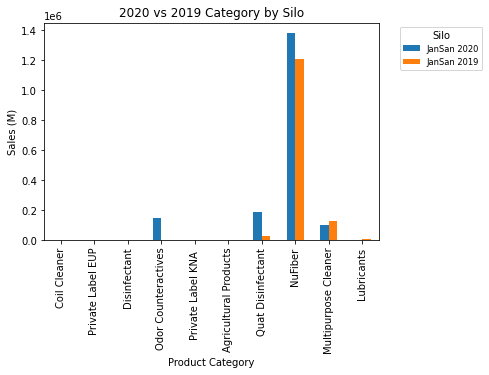

In [47]:
labels= sales_by_category_20.head(10).index
jansan_comparedf =pd.DataFrame({"JanSan 2020": jan_sales_20,
                         "JanSan 2019": jan_sales_19},
                    index=labels)
jansan_comparedf.plot(kind='bar')
plt.title('2020 vs 2019 Category by Silo')
plt.xlabel('Product Category')
plt.ylabel('Sales (M)')
plt.legend(title='Silo', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')